<a href="https://colab.research.google.com/github/ttuyetdinh/diveintocode-ml/blob/master/Week%204/Assign13_Classification_Irises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
pd.set_option('max_rows', 10)
pd.set_option('max_colwidth', 400)

In [4]:
data_read=load_iris()
xs=pd.DataFrame(data = data_read.data, columns=data_read.feature_names)
ys=pd.DataFrame(data_read.target,columns=['Species'])
print(data_read.target_names)
temp1=xs.iloc[50:150,0:1]
temp2=xs.iloc[50:150,2:3]
df= pd.concat([temp1,temp2],axis=1)
df=pd.concat([df,ys[50:150]], axis=1)
df.head()

['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


#Problem 2

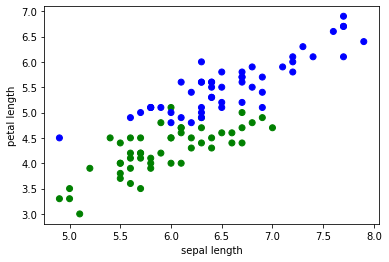

In [5]:
colormap = np.array(['r', 'g', 'b'])
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=colormap[df["Species"]] )
plt.show()

<AxesSubplot:title={'center':'virginica'}>

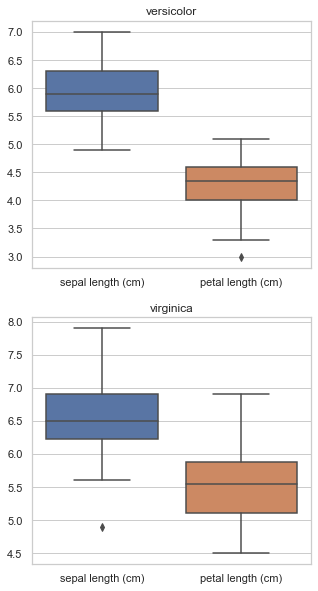

In [6]:
sns.set_theme(style = "whitegrid")
fig1, axes = plt.subplots(2, 1, figsize = (5,10))
axes[0].set_title("versicolor")
sns.boxplot(ax = axes[0], data = df.iloc[0:50,0:2])
axes[1].set_title("virginica")
sns.boxplot(ax = axes[1], data = df.iloc[50:100,0:2])

<AxesSubplot:title={'center':'virginica'}>

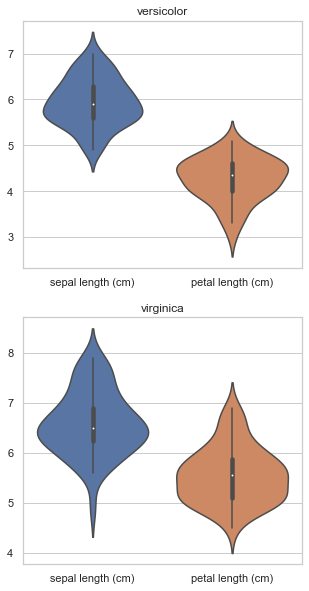

In [7]:
sns.set_theme(style = "whitegrid")
fig1, axes = plt.subplots(2, 1, figsize = (5,10))
axes[0].set_title("versicolor")
sns.violinplot(ax = axes[0], data = df.iloc[0:50,0:2])
axes[1].set_title("virginica")
sns.violinplot(ax = axes[1], data = df.iloc[50:100,0:2])

#Problem 3

In [8]:
#X is train, y is validation
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.loc[:,"Species"], train_size=0.75, random_state=42, shuffle=True )


#Problem 4

In [9]:
scaler = StandardScaler()
X_train_fit = scaler.fit(X_train)
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

#Problem 5

In [10]:
neigh_1 = KNeighborsClassifier(n_neighbors=1)
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_5 = KNeighborsClassifier(n_neighbors=5)
neigh_1.fit(X_train_trans,y_train)
neigh_3.fit(X_train_trans,y_train)
neigh_5.fit(X_train_trans,y_train)
y_pre_n1=neigh_1.predict(X_test_trans)
y_pre_n3=neigh_3.predict(X_test_trans)
y_pre_n5=neigh_5.predict(X_test_trans)
print('real species: {}'.format(np.array(y_test)))
print('1-nn predict: {}'.format(y_pre_n1))
print('3-nn predict: {}'.format(y_pre_n3))
print('5-nn predict: {}'.format(y_pre_n5))

real species: [2 2 2 1 1 1 1 2 1 1 1 1 2 1 2 1 2 2 1 1 2 2 1 1 2]
1-nn predict: [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
3-nn predict: [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
5-nn predict: [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]


#Problem 6
- Accuracy: the ratio of correctly predicted scores and the total score during data verification
- Precision: defined as the ratio of the number of true positive points among those classified as positive
- Recall: defined as the ratio of the number of true positive points to those that are actually positive
- F1:  interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0 

In [11]:
def evaluate(y_pre, y_test):
  acc = metrics.accuracy_score(y_test, y_pre)
  precision = metrics.precision_score(y_test, y_pre)
  recall = metrics.recall_score(y_test, y_pre)
  f1= metrics.f1_score(y_test, y_pre)
  confusion = metrics.confusion_matrix(y_test, y_pre)
  return acc, precision, f1, recall, confusion
print(' 1-nn')
print(' acc: {}\n precesion: {}\n f1: {}\n recall: {}\n confusion:\n{}' .format(*evaluate(y_pre_n1,y_test)))

 1-nn
 acc: 0.8
 precesion: 0.8
 f1: 0.8275862068965518
 recall: 0.8571428571428571
 confusion:
[[12  2]
 [ 3  8]]


#Problem 7

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

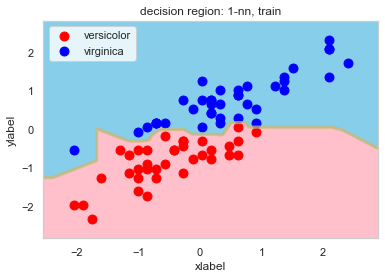

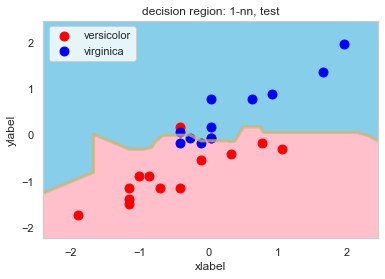

In [13]:
model = [neigh_1, neigh_3, neigh_5]
neigh_name = ['1-nn', '3-nn', '5-nn']
for model, neigh_name in zip(model, neigh_name):
  decision_region(X_train_trans,y_train, model, title='decision region: {}, {}'.format(neigh_name, 'train'))
  decision_region(X_test_trans,y_test, model, title='decision region: {}, {}'.format(neigh_name, 'test'))

#Problem 8

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
logistic = LogisticRegression()
svc = SVC()
tree = DecisionTreeClassifier()
ranforest= RandomForestClassifier()
models = [logistic, svc, tree, ranforest]
model_name = ['logistic', 'svc', 'tree', 'ranforest']
for models, model_name in zip(models, model_name):
  print(model_name)
  model.fit(X_train_trans, y_train)
  y_pre = model.predict(X_test_trans)
  decision_region(X_train_trans,y_train, model, title='decision region: {}, {}'.format(model_name, 'train'))
  decision_region(X_test_trans,y_test, model, title='decision region: {}, {}'.format(model_name, 'test'))

#Problem 9

In [ ]:
models = [neigh_1, logistic, svc, tree, ranforest]
model_name = ['1-nn','logistic', 'svc', 'tree', 'ranforest']
for models, model_name in zip(models, model_name):
  print(model_name)
  model.fit(X_train, y_train)
  y_pre = model.predict(X_test)
  decision_region(np.array(X_train),y_train, model, title='decision region: {}, {}'.format(model_name, 'train'))
  decision_region(np.array(X_test),y_test, model, title='decision region: {}, {}'.format(model_name, 'test'))

#Problem 10

In [64]:
def decision_region_3(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 3)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue','lightgreen']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [66]:
df_all= pd.concat([xs,ys],axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(df_all.loc[:, ['sepal length (cm)', 'petal length (cm)']], df_all.loc[:,"Species"], train_size=0.75, random_state=42, shuffle=True )
X1_train_fit = scaler.fit(X1_train)
X1_train_trans = scaler.transform(X1_train)
X1_test_trans = scaler.transform(X1_test)

1-nn


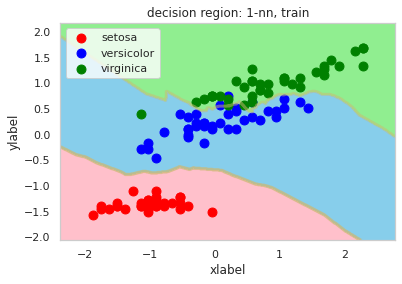

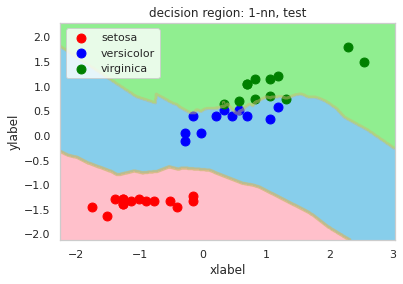

logistic


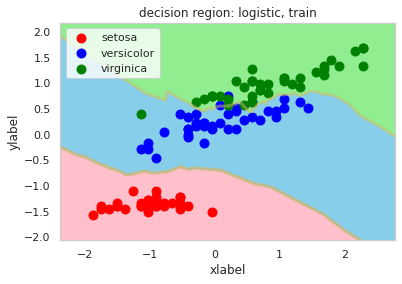

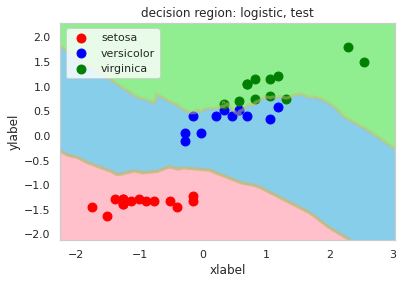

svc


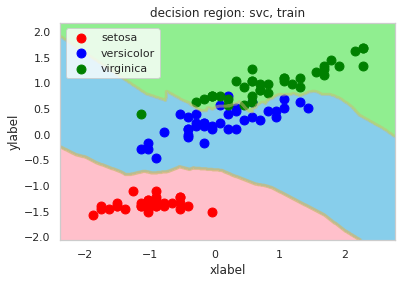

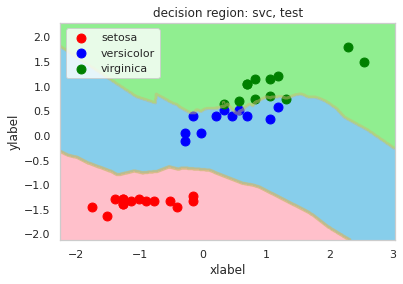

tree


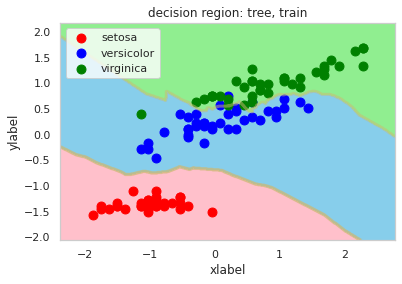

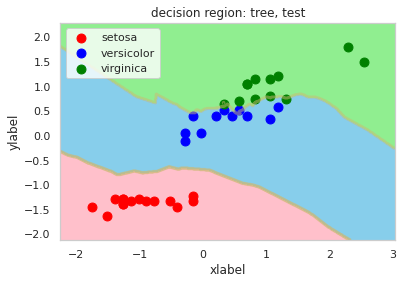

ranforest


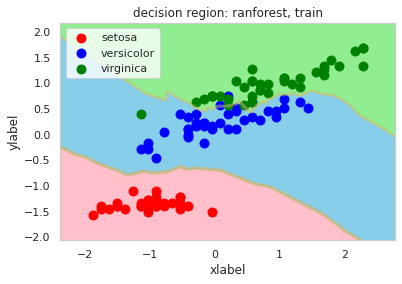

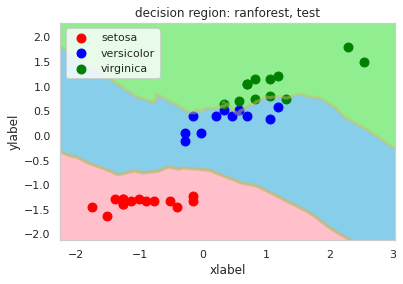

In [67]:
models = [neigh_1, logistic, svc, tree, ranforest]
model_name = ['1-nn','logistic', 'svc', 'tree', 'ranforest']
for models, model_name in zip(models, model_name):
  print(model_name)
  model.fit(X1_train_trans, y1_train)
  y1_pre = model.predict(X_test_trans)
  decision_region_3(X1_train_trans,y1_train, model, title='decision region: {}, {}'.format(model_name, 'train'))
  decision_region_3(X1_test_trans,y1_test, model, title='decision region: {}, {}'.format(model_name, 'test'))